In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv_file_path = 'website.csv'  
dw = pd.read_csv(csv_file_path)
dw.head()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,20a70111,29-02-2024 01:57,0,NaN,direct,NaN
1,20a70111,29-02-2024 13:58,0,NaN,direct,NaN
2,58830f30,18-01-2024 13:22,0,NaN,direct,NaN
3,58830f30,19-01-2024 16:19,0,NaN,direct,NaN
4,58830f30,22-01-2024 13:33,0,NaN,direct,NaN


In [22]:
csv_file_path = 'website2.csv'  
dw2 = pd.read_csv(csv_file_path)
dw2.head()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,f7093a95,02-02-2024 01:19,0,google,organic search,NaN
1,f7093a95,20-02-2024 17:53,0,google,organic search,NaN
2,f7093a95,03-03-2024 04:51,0,google,organic search,NaN
3,f7093a95,23-04-2024 04:28,0,NaN,direct,NaN
4,f7093a95,23-04-2024 04:29,0,NaN,direct,NaN


In [24]:
import pandas as pd

# Define the selected sources
selected_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat',
    'google', 'youtube', 'gmail', 'google images', 'google news', 'bing',
    'outlook.com', 'skype', 'linkedin', 'hotmail'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)


# Filter the datasets based on selected_sources
filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]



# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Print the first few rows of the combined dataset to verify
print("Combined Dataset (Unique):")
print(combined_dataset_unique.head(), "\n")

# Save the combined dataset to a CSV file (if needed)
combined_dataset_unique.to_csv('combined_filtered_dataset.csv', index=False)



Combined Dataset (Unique):
    User Id Website Landing Time  Is Converted  Source         Channel  \
0  58830f30     14-03-2024 11:52             0  google  organic search   
1  58830f30     02-05-2024 14:33             0  google  organic search   
2  58830f30     02-05-2024 14:43             0  google  organic search   
3  3ca3b062     26-03-2024 02:42             0  google  organic search   
4  3ca3b062     26-03-2024 02:43             0  google  organic search   

  Campaign Type  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN   



In [30]:
import pandas as pd

# Define the selected sources
selected_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat',
    'google', 'youtube', 'gmail', 'google images', 'google news', 'bing',
    'outlook.com', 'skype', 'linkedin', 'hotmail'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)

# Filter the datasets based on selected_sources
filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]

# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Print the first few rows of the combined dataset to verify
print("Combined Dataset (Unique):")
print(combined_dataset_unique.head(), "\n")

# Calculate conversion rates for each category

def calculate_conversion_rate(df, group_by_cols):
    # Group by the specified columns
    grouped = df.groupby(group_by_cols).agg(
        Total_Users=('User Id', 'count'),
        Converted_Users=('Is Converted', 'sum')
    ).reset_index()
    
    # Calculate conversion rate
    grouped['Conversion Rate (%)'] = (grouped['Converted_Users'] / grouped['Total_Users']) * 100  # Convert to percentage
    
    return grouped

# Calculate conversion rates for Source, Channel, and Campaign Type
conversion_by_source = calculate_conversion_rate(combined_dataset_unique, ['Source'])
conversion_by_channel = calculate_conversion_rate(combined_dataset_unique, ['Channel'])
conversion_by_campaign_type = calculate_conversion_rate(combined_dataset_unique, ['Campaign Type'])

# Print results
print("Conversion Rate by Source:")
print(conversion_by_source, "\n")

print("Conversion Rate by Channel:")
print(conversion_by_channel, "\n")

print("Conversion Rate by Campaign Type:")
print(conversion_by_campaign_type, "\n")

# Save the results to CSV files (if needed)
conversion_by_source.to_csv('conversion_by_source.csv', index=False)
conversion_by_channel.to_csv('conversion_by_channel.csv', index=False)
conversion_by_campaign_type.to_csv('conversion_by_campaign_type.csv', index=False)


Combined Dataset (Unique):
    User Id Website Landing Time  Is Converted  Source         Channel  \
0  58830f30     14-03-2024 11:52             0  google  organic search   
1  58830f30     02-05-2024 14:33             0  google  organic search   
2  58830f30     02-05-2024 14:43             0  google  organic search   
3  3ca3b062     26-03-2024 02:42             0  google  organic search   
4  3ca3b062     26-03-2024 02:43             0  google  organic search   

  Campaign Type  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN   

Conversion Rate by Source:
           Source  Total_Users  Converted_Users  Conversion Rate (%)
0            bing       132599             2273             1.714191
1        facebook        67800              246             0.362832
2           gmail          718               21             2.924791
3          google       600781            11063             1.841436
4   google images            3                

In [26]:
import pandas as pd

# Define the selected sources and group_1_sources
selected_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat',
    'google', 'youtube', 'gmail', 'google images', 'google news', 'bing',
    'outlook.com', 'skype', 'linkedin', 'hotmail'
]

group_1_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)

# Filter the datasets based on selected_sources
filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]

# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Create a new group with sources only in group_1_sources
filtered_group_1 = combined_dataset_unique[combined_dataset_unique['Source'].str.lower().isin([source.lower() for source in group_1_sources])]

# Print the filtered group_1 dataset to verify
print("Filtered Dataset with Group 1 Sources:")
print(filtered_group_1.head(), "\n")

# Save the filtered group_1 dataset to a CSV file (if needed)
filtered_group_1.to_csv('filtered_group_1_sources.csv', index=False)


Filtered Dataset with Group 1 Sources:
     User Id Website Landing Time  Is Converted    Source Channel  \
8   2498ee64     02-02-2024 23:05             0  facebook    paid   
9   8f1af1a9     01-01-2024 05:23             0  facebook    paid   
19  9bb66325     06-01-2024 14:05             0  facebook    paid   
23  f67a4730     08-01-2024 06:17             0  facebook    paid   
26  df1e0072     09-01-2024 22:16             0  facebook    paid   

   Campaign Type  
8            NaN  
9            NaN  
19           NaN  
23           NaN  
26           NaN   



In [37]:
import pandas as pd

# Define the selected sources and group_1_sources
selected_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat',
    'google', 'youtube', 'gmail', 'google images', 'google news', 'bing',
    'outlook.com', 'skype', 'linkedin', 'hotmail'
]

group_1_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)

# Filter the datasets based on selected_sources
filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]

# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Create a new group with sources only in group_1_sources
filtered_group_1 = combined_dataset_unique[combined_dataset_unique['Source'].str.lower().isin([source.lower() for source in group_1_sources])]

# Print filtered group_1 to inspect data
print("Filtered Dataset with Group 1 Sources:")
print(filtered_group_1.head(), "\n")

# Calculate conversion rates for sources and channels
def calculate_conversion_rate(df, group_by_cols):
    grouped = df.groupby(group_by_cols).agg(
        Total_Users=('User Id', 'count'),
        Converted_Users=('Is Converted', 'sum')
    ).reset_index()
    
    grouped['Conversion Rate (%)'] = (grouped['Converted_Users'] / grouped['Total_Users']) * 100
    return grouped

# Calculate conversion rates for Source and Channel in the filtered group 1 dataset
conversion_by_source = calculate_conversion_rate(filtered_group_1, ['Source'])
conversion_by_channel = calculate_conversion_rate(filtered_group_1, ['Channel'])

print("Conversion Rate by Source in Group 1:")
print(conversion_by_source, "\n")

print("Conversion Rate by Channel in Group 1:")
print(conversion_by_channel, "\n")

# Check if the Campaign Type column has any non-null values
if filtered_group_1['Campaign Type'].notna().any():
    # Calculate conversion rates for Campaign Type
    filtered_group_1_campaign = filtered_group_1.dropna(subset=['Campaign Type'])
    
    if not filtered_group_1_campaign.empty:
        conversion_by_campaign_type = calculate_conversion_rate(filtered_group_1_campaign, ['Campaign Type'])
        print("Conversion Rate by Campaign Type in Group 1:")
        print(conversion_by_campaign_type, "\n")
        
        # Save the results to CSV files
        conversion_by_campaign_type.to_csv('conversion_by_campaign_type_group_1.csv', index=False)
    else:
        print("No data available for Campaign Type after dropping NaNs.")
else:
    print("Campaign Type column contains only NaN values; skipping Campaign Type analysis.")

# Save the results for Source and Channel to CSV files
conversion_by_source.to_csv('conversion_by_source_group_1.csv', index=False)
conversion_by_channel.to_csv('conversion_by_channel_group_1.csv', index=False)


Filtered Dataset with Group 1 Sources:
     User Id Website Landing Time  Is Converted    Source Channel  \
8   2498ee64     02-02-2024 23:05             0  facebook    paid   
9   8f1af1a9     01-01-2024 05:23             0  facebook    paid   
19  9bb66325     06-01-2024 14:05             0  facebook    paid   
23  f67a4730     08-01-2024 06:17             0  facebook    paid   
26  df1e0072     09-01-2024 22:16             0  facebook    paid   

   Campaign Type  
8            NaN  
9            NaN  
19           NaN  
23           NaN  
26           NaN   

Conversion Rate by Source in Group 1:
      Source  Total_Users  Converted_Users  Conversion Rate (%)
0   facebook        67800              246             0.362832
1  instagram          930                2             0.215054
2   snapchat           20                0             0.000000
3     tiktok         5692                3             0.052706 

Conversion Rate by Channel in Group 1:
  Channel  Total_Users  Convert

In [28]:
import pandas as pd

# Define the group_2_sources
group_2_sources = [
    'google', 'youtube', 'gmail', 'google images', 'google news'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)

# Filter the datasets based on selected_sources
filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]

# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Create a new group with sources only in group_2_sources
filtered_group_2 = combined_dataset_unique[combined_dataset_unique['Source'].str.lower().isin([source.lower() for source in group_2_sources])]

# Print the filtered group_2 dataset to verify
print("Filtered Dataset with Group 2 Sources:")
print(filtered_group_2.head(), "\n")

# Save the filtered group_2 dataset to a CSV file (if needed)
filtered_group_2.to_csv('filtered_group_2_sources.csv', index=False)


Filtered Dataset with Group 2 Sources:
    User Id Website Landing Time  Is Converted  Source         Channel  \
0  58830f30     14-03-2024 11:52             0  google  organic search   
1  58830f30     02-05-2024 14:33             0  google  organic search   
2  58830f30     02-05-2024 14:43             0  google  organic search   
3  3ca3b062     26-03-2024 02:42             0  google  organic search   
4  3ca3b062     26-03-2024 02:43             0  google  organic search   

  Campaign Type  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN   



In [38]:
import pandas as pd

# Define the group_2_sources
group_2_sources = [
    'google', 'youtube', 'gmail', 'google images', 'google news'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)

# Filter the datasets based on selected_sources
filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]

# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Create a new group with sources only in group_2_sources
filtered_group_2 = combined_dataset_unique[combined_dataset_unique['Source'].str.lower().isin([source.lower() for source in group_2_sources])]

# Print the filtered group_2 dataset to verify
print("Filtered Dataset with Group 2 Sources:")
print(filtered_group_2.head(), "\n")

# Save the filtered group_2 dataset to a CSV file (if needed)
filtered_group_2.to_csv('filtered_group_2_sources.csv', index=False)

# Calculate conversion rates for sources and channels
def calculate_conversion_rate(df, group_by_cols):
    grouped = df.groupby(group_by_cols).agg(
        Total_Users=('User Id', 'count'),
        Converted_Users=('Is Converted', 'sum')
    ).reset_index()
    
    grouped['Conversion Rate (%)'] = (grouped['Converted_Users'] / grouped['Total_Users']) * 100
    return grouped

# Calculate conversion rates for Source and Channel in the filtered group 2 dataset
conversion_by_source = calculate_conversion_rate(filtered_group_2, ['Source'])
conversion_by_channel = calculate_conversion_rate(filtered_group_2, ['Channel'])

print("Conversion Rate by Source in Group 2:")
print(conversion_by_source, "\n")

print("Conversion Rate by Channel in Group 2:")
print(conversion_by_channel, "\n")

# Check if the Campaign Type column has any non-null values
if filtered_group_2['Campaign Type'].notna().any():
    # Calculate conversion rates for Campaign Type
    filtered_group_2_campaign = filtered_group_2.dropna(subset=['Campaign Type'])
    
    if not filtered_group_2_campaign.empty:
        conversion_by_campaign_type = calculate_conversion_rate(filtered_group_2_campaign, ['Campaign Type'])
        print("Conversion Rate by Campaign Type in Group 2:")
        print(conversion_by_campaign_type, "\n")
        
        # Save the results to CSV files
        conversion_by_campaign_type.to_csv('conversion_by_campaign_type_group_2.csv', index=False)
    else:
        print("No data available for Campaign Type after dropping NaNs.")
else:
    print("Campaign Type column contains only NaN values; skipping Campaign Type analysis.")

# Save the results for Source and Channel to CSV files
conversion_by_source.to_csv('conversion_by_source_group_2.csv', index=False)
conversion_by_channel.to_csv('conversion_by_channel_group_2.csv', index=False)


Filtered Dataset with Group 2 Sources:
    User Id Website Landing Time  Is Converted  Source         Channel  \
0  58830f30     14-03-2024 11:52             0  google  organic search   
1  58830f30     02-05-2024 14:33             0  google  organic search   
2  58830f30     02-05-2024 14:43             0  google  organic search   
3  3ca3b062     26-03-2024 02:42             0  google  organic search   
4  3ca3b062     26-03-2024 02:43             0  google  organic search   

  Campaign Type  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN   

Conversion Rate by Source in Group 2:
          Source  Total_Users  Converted_Users  Conversion Rate (%)
0          gmail          718               21             2.924791
1         google       600781            11063             1.841436
2  google images            3                0             0.000000
3    google news            3                0             0.000000
4        youtube        1399

In [29]:
import pandas as pd

# Define the group_3_sources
group_3_sources = [
    'bing', 'outlook.com', 'skype', 'linkedin', 'hotmail'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)

# Filter the datasets based on selected_sources
selected_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat',
    'google', 'youtube', 'gmail', 'google images', 'google news', 'bing',
    'outlook.com', 'skype', 'linkedin', 'hotmail'
]

filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]

# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Create a new group with sources only in group_3_sources
filtered_group_3 = combined_dataset_unique[combined_dataset_unique['Source'].str.lower().isin([source.lower() for source in group_3_sources])]

# Print the filtered group_3 dataset to verify
print("Filtered Dataset with Group 3 Sources:")
print(filtered_group_3.head(), "\n")

# Save the filtered group_3 dataset to a CSV file (if needed)
filtered_group_3.to_csv('filtered_group_3_sources.csv', index=False)


Filtered Dataset with Group 3 Sources:
     User Id Website Landing Time  Is Converted Source         Channel  \
12  bb26323a     22-01-2024 14:52             0   bing            paid   
37  119edc4e     16-01-2024 17:44             0   bing  organic search   
44  0cee701f     22-01-2024 05:09             0   bing            paid   
47  fecf2e0c     22-01-2024 22:30             0   bing            paid   
50  d0738575     25-01-2024 19:22             0   bing            paid   

       Campaign Type  
12          Shopping  
37               NaN  
44          Shopping  
47          Shopping  
50  Search & content   



In [39]:
import pandas as pd

# Define the group_3_sources
group_3_sources = [
    'bing', 'outlook.com', 'skype', 'linkedin', 'hotmail'
]

# Load the datasets
csv_file_path_1 = 'website.csv'
csv_file_path_2 = 'website2.csv'

dw = pd.read_csv(csv_file_path_1)
dw2 = pd.read_csv(csv_file_path_2)

# Filter the datasets based on selected_sources
selected_sources = [
    'facebook', 'instagram', 'whatsapp', 'messenger', 'tiktok', 'snapchat',
    'google', 'youtube', 'gmail', 'google images', 'google news', 'bing',
    'outlook.com', 'skype', 'linkedin', 'hotmail'
]

filtered_dw = dw[dw['Source'].str.lower().isin([source.lower() for source in selected_sources])]
filtered_dw2 = dw2[dw2['Source'].str.lower().isin([source.lower() for source in selected_sources])]

# Combine the filtered datasets
combined_dataset = pd.concat([filtered_dw, filtered_dw2], ignore_index=True)

# Remove duplicate rows
combined_dataset_unique = combined_dataset.drop_duplicates()

# Create a new group with sources only in group_3_sources
filtered_group_3 = combined_dataset_unique[combined_dataset_unique['Source'].str.lower().isin([source.lower() for source in group_3_sources])]

# Print the filtered group_3 dataset to verify
print("Filtered Dataset with Group 3 Sources:")
print(filtered_group_3.head(), "\n")

# Save the filtered group_3 dataset to a CSV file (if needed)
filtered_group_3.to_csv('filtered_group_3_sources.csv', index=False)

# Calculate conversion rates for sources and channels
def calculate_conversion_rate(df, group_by_cols):
    grouped = df.groupby(group_by_cols).agg(
        Total_Users=('User Id', 'count'),
        Converted_Users=('Is Converted', 'sum')
    ).reset_index()
    
    grouped['Conversion Rate (%)'] = (grouped['Converted_Users'] / grouped['Total_Users']) * 100
    return grouped

# Calculate conversion rates for Source and Channel in the filtered group 3 dataset
conversion_by_source = calculate_conversion_rate(filtered_group_3, ['Source'])
conversion_by_channel = calculate_conversion_rate(filtered_group_3, ['Channel'])

print("Conversion Rate by Source in Group 3:")
print(conversion_by_source, "\n")

print("Conversion Rate by Channel in Group 3:")
print(conversion_by_channel, "\n")

# Check if the Campaign Type column has any non-null values
if filtered_group_3['Campaign Type'].notna().any():
    # Calculate conversion rates for Campaign Type
    filtered_group_3_campaign = filtered_group_3.dropna(subset=['Campaign Type'])
    
    if not filtered_group_3_campaign.empty:
        conversion_by_campaign_type = calculate_conversion_rate(filtered_group_3_campaign, ['Campaign Type'])
        print("Conversion Rate by Campaign Type in Group 3:")
        print(conversion_by_campaign_type, "\n")
        
        # Save the results to CSV files
        conversion_by_campaign_type.to_csv('conversion_by_campaign_type_group_3.csv', index=False)
    else:
        print("No data available for Campaign Type after dropping NaNs.")
else:
    print("Campaign Type column contains only NaN values; skipping Campaign Type analysis.")

# Save the results for Source and Channel to CSV files
conversion_by_source.to_csv('conversion_by_source_group_3.csv', index=False)
conversion_by_channel.to_csv('conversion_by_channel_group_3.csv', index=False)


Filtered Dataset with Group 3 Sources:
     User Id Website Landing Time  Is Converted Source         Channel  \
12  bb26323a     22-01-2024 14:52             0   bing            paid   
37  119edc4e     16-01-2024 17:44             0   bing  organic search   
44  0cee701f     22-01-2024 05:09             0   bing            paid   
47  fecf2e0c     22-01-2024 22:30             0   bing            paid   
50  d0738575     25-01-2024 19:22             0   bing            paid   

       Campaign Type  
12          Shopping  
37               NaN  
44          Shopping  
47          Shopping  
50  Search & content   

Conversion Rate by Source in Group 3:
        Source  Total_Users  Converted_Users  Conversion Rate (%)
0         bing       132599             2273             1.714191
1     linkedin           15                0             0.000000
2  outlook.com         1097                4             0.364631
3        skype            3                0             0.000000 

Conver

In [ ]:
#metaads 1&21

In [40]:
import pandas as pd

# Load the datasets
meta1 = pd.read_csv('metaads.csv')
meta2 = pd.read_csv('metaads2.csv')

# Combine the datasets
meta_combined = pd.concat([meta1, meta2], ignore_index=True)

# Remove duplicates
meta_combined = meta_combined.drop_duplicates()

# Remove rows with any null values
meta_combined = meta_combined.dropna()

# Save the cleaned combined dataset
meta_combined.to_csv('meta_combined_cleaned.csv', index=False)

# Load the cleaned dataset
meta_combined = pd.read_csv('meta_combined_cleaned.csv')

# Convert 'Date' column to datetime with specified format
meta_combined['Date'] = pd.to_datetime(meta_combined['Date'], format='%d-%m-%Y')

# Create additional features
meta_combined['Cost per Click'] = meta_combined['Cost'] / meta_combined['Clicks']
meta_combined['Conversion Rate'] = meta_combined['Conversions'] / meta_combined['Clicks']
meta_combined['ROI'] = meta_combined['Revenue'] / meta_combined['Cost']

# Calculate additional metrics using the Impressions column
meta_combined['Click-Through Rate (CTR)'] = meta_combined['Clicks'] / meta_combined['Impressions'] * 100
meta_combined['Cost per Impression (CPM)'] = meta_combined['Cost'] / meta_combined['Impressions'] * 1000
meta_combined['Conversion Rate per Impression'] = meta_combined['Conversions'] / meta_combined['Impressions'] * 100

# Display basic information
print("Meta Combined Dataset (Cleaned):")
print(meta_combined.info())
print(meta_combined.head())


Meta Combined Dataset (Cleaned):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            364 non-null    datetime64[ns]
 1   Impressions                     364 non-null    int64         
 2   Reach                           364 non-null    int64         
 3   Cost                            364 non-null    float64       
 4   Clicks                          364 non-null    int64         
 5   Conversions                     364 non-null    int64         
 6   Revenue                         364 non-null    float64       
 7   Cost per Click                  364 non-null    float64       
 8   Conversion Rate                 364 non-null    float64       
 9   ROI                             364 non-null    float64       
 10  Click-Through Rate (CTR)        364 non-n

In [ ]:
#google 2 & 22


In [42]:
import pandas as pd

# Load the datasets
google1 = pd.read_csv('google.csv')
google2 = pd.read_csv('google2.csv')

# Combine the datasets
google_combined = pd.concat([google1, google2], ignore_index=True)

# Remove duplicates
google_combined = google_combined.drop_duplicates()

# Remove rows with any null values
google_combined = google_combined.dropna()

# Save the cleaned combined dataset
google_combined.to_csv('google_combined_cleaned.csv', index=False)

# Load the cleaned combined Google dataset
google_combined = pd.read_csv('google_combined_cleaned.csv')

# Create additional features
google_combined['Cost per Click'] = google_combined['Cost'] / google_combined['Clicks']
google_combined['Conversion Rate'] = google_combined['Conversions'] / google_combined['Clicks']
google_combined['ROI'] = google_combined['Revenue'] / google_combined['Cost']
google_combined['Click-Through Rate (CTR)'] = google_combined['Clicks'] / google_combined['Impressions'] * 100
google_combined['Cost per Impression (CPM)'] = google_combined['Cost'] / google_combined['Impressions'] * 1000
google_combined['Conversion Rate per Impression'] = google_combined['Conversions'] / google_combined['Impressions'] * 100

# Display the updated dataset with additional features
print("Google Combined Dataset with Additional Features:")
print(google_combined.info())
print(google_combined.head())

# Analyze the relationship with Campaign type
if 'Campaign type' in google_combined.columns:
    # Calculate average metrics by Campaign type
    campaign_type_analysis = google_combined.groupby('Campaign type').agg(
        Average_Cost_per_Click=('Cost per Click', 'mean'),
        Average_Conversion_Rate=('Conversion Rate', 'mean'),
        Average_ROI=('ROI', 'mean'),
        Average_CTR=('Click-Through Rate (CTR)', 'mean'),
        Average_CPM=('Cost per Impression (CPM)', 'mean'),
        Average_Conversion_Rate_per_Impression=('Conversion Rate per Impression', 'mean')
    ).reset_index()
    
    # Display the analysis
    print("Campaign Type Analysis:")
    print(campaign_type_analysis)

    # Optionally, save the analysis results
    campaign_type_analysis.to_csv('campaign_type_analysis_google.csv', index=False)
else:
    print("Campaign type column is not available in the dataset.")
    
# Save the updated dataset with additional features
google_combined.to_csv('google_combined_with_features.csv', index=False)


Google Combined Dataset with Additional Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            1184 non-null   object 
 1   Campaign type                   1184 non-null   object 
 2   Impressions                     1184 non-null   int64  
 3   Clicks                          1184 non-null   int64  
 4   Cost                            1184 non-null   float64
 5   Conversions                     1184 non-null   float64
 6   Revenue                         1184 non-null   float64
 7   Cost per Click                  1111 non-null   float64
 8   Conversion Rate                 1005 non-null   float64
 9   ROI                             1111 non-null   float64
 10  Click-Through Rate (CTR)        1184 non-null   float64
 11  Cost per Impression (CPM)       1184 non-null

In [ ]:
#microsoft 3 &32

In [43]:
import pandas as pd

# Load the datasets
micro1 = pd.read_csv('micro.csv')
micro2 = pd.read_csv('micro2.csv')

# Combine the datasets
micro_combined = pd.concat([micro1, micro2], ignore_index=True)

# Remove duplicates
micro_combined = micro_combined.drop_duplicates()

# Remove rows with any null values
micro_combined = micro_combined.dropna()

# Save the cleaned combined dataset
micro_combined.to_csv('micro_combined_cleaned.csv', index=False)

# Load the cleaned combined Microsoft dataset
micro_combined = pd.read_csv('micro_combined_cleaned.csv')

# Create additional features
micro_combined['Cost per Click'] = micro_combined['Cost'] / micro_combined['Clicks']
micro_combined['Conversion Rate'] = micro_combined['Conversions'] / micro_combined['Clicks']
micro_combined['ROI'] = micro_combined['Revenue'] / micro_combined['Cost']
micro_combined['Click-Through Rate (CTR)'] = micro_combined['Clicks'] / micro_combined['Impressions'] * 100
micro_combined['Cost per Impression (CPM)'] = micro_combined['Cost'] / micro_combined['Impressions'] * 1000
micro_combined['Conversion Rate per Impression'] = micro_combined['Conversions'] / micro_combined['Impressions'] * 100

# Display the updated dataset with additional features
print("Microsoft Combined Dataset with Additional Features:")
print(micro_combined.info())
print(micro_combined.head())

# Analyze the relationship with Campaign type
if 'Campaign type' in micro_combined.columns:
    # Calculate average metrics by Campaign type
    campaign_type_analysis = micro_combined.groupby('Campaign type').agg(
        Average_Cost_per_Click=('Cost per Click', 'mean'),
        Average_Conversion_Rate=('Conversion Rate', 'mean'),
        Average_ROI=('ROI', 'mean'),
        Average_CTR=('Click-Through Rate (CTR)', 'mean'),
        Average_CPM=('Cost per Impression (CPM)', 'mean'),
        Average_Conversion_Rate_per_Impression=('Conversion Rate per Impression', 'mean')
    ).reset_index()
    
    # Display the analysis
    print("Campaign Type Analysis:")
    print(campaign_type_analysis)

    # Optionally, save the analysis results
    campaign_type_analysis.to_csv('campaign_type_analysis_micro.csv', index=False)
else:
    print("Campaign type column is not available in the dataset.")
    
# Save the updated dataset with additional features
micro_combined.to_csv('micro_combined_with_features.csv', index=False)


Microsoft Combined Dataset with Additional Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            1085 non-null   object 
 1   Campaign type                   1085 non-null   object 
 2   Impressions                     1085 non-null   int64  
 3   Clicks                          1085 non-null   int64  
 4   Cost                            1085 non-null   float64
 5   Conversions                     1085 non-null   int64  
 6   Revenue                         1085 non-null   float64
 7   Cost per Click                  1074 non-null   float64
 8   Conversion Rate                 1074 non-null   float64
 9   ROI                             1072 non-null   float64
 10  Click-Through Rate (CTR)        1084 non-null   float64
 11  Cost per Impression (CPM)       1084 non-n

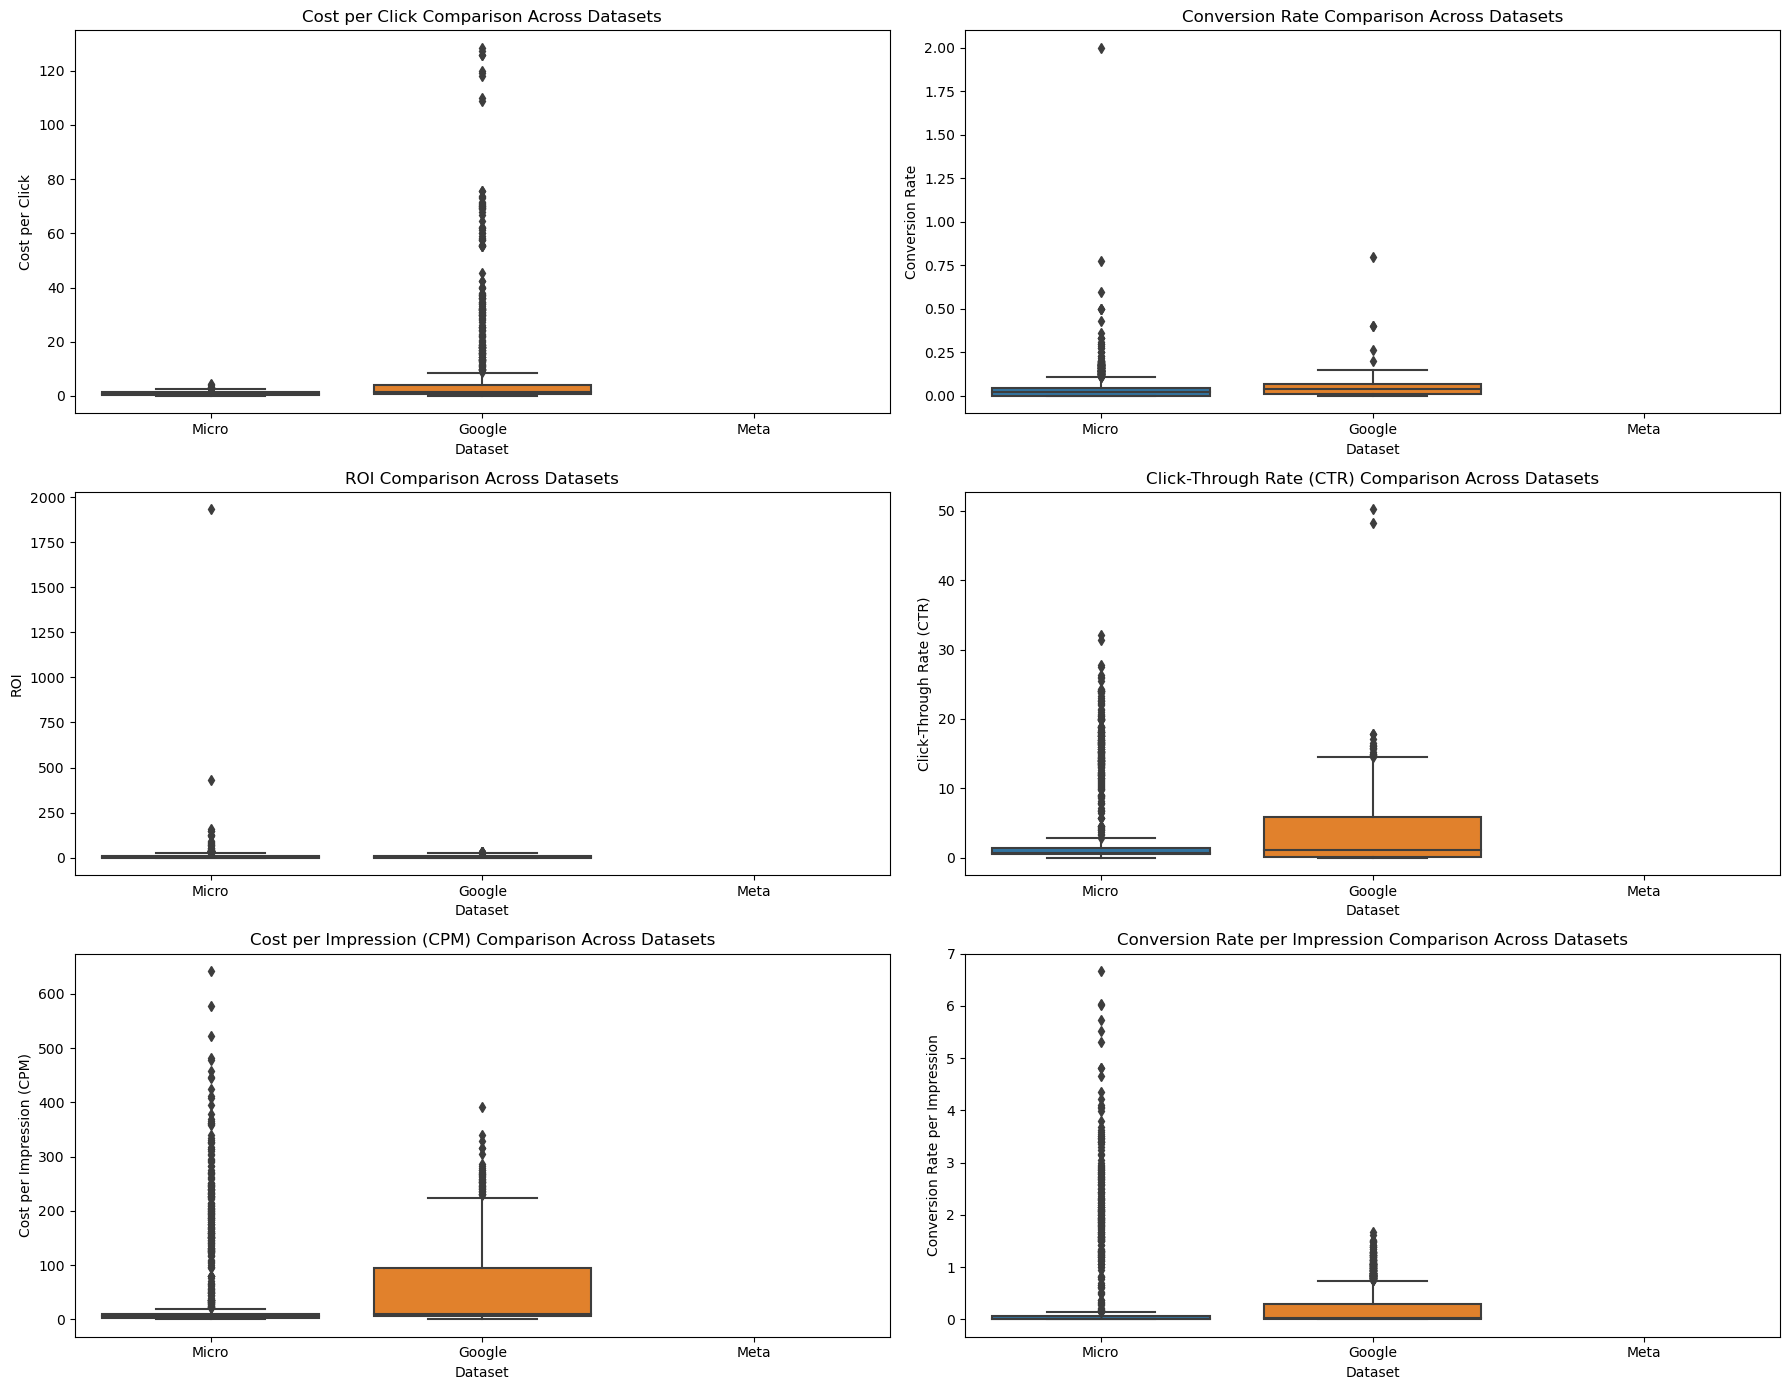

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned datasets
micro_combined = pd.read_csv('micro_combined_with_features.csv')
google_combined = pd.read_csv('google_combined_with_features.csv')
meta_combined = pd.read_csv('meta_combined_cleaned.csv')

# Add a dataset identifier column
micro_combined['Dataset'] = 'Micro'
google_combined['Dataset'] = 'Google'
meta_combined['Dataset'] = 'Meta'

# Combine all datasets
all_combined = pd.concat([micro_combined, google_combined, meta_combined], ignore_index=True)

# Define metrics to compare
metrics = [
    'Cost per Click',
    'Conversion Rate',
    'ROI',
    'Click-Through Rate (CTR)',
    'Cost per Impression (CPM)',
    'Conversion Rate per Impression'
]

# Create a figure with subplots
plt.figure(figsize=(18, 14))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Dataset', y=metric, data=all_combined)
    plt.title(f'{metric} Comparison Across Datasets')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


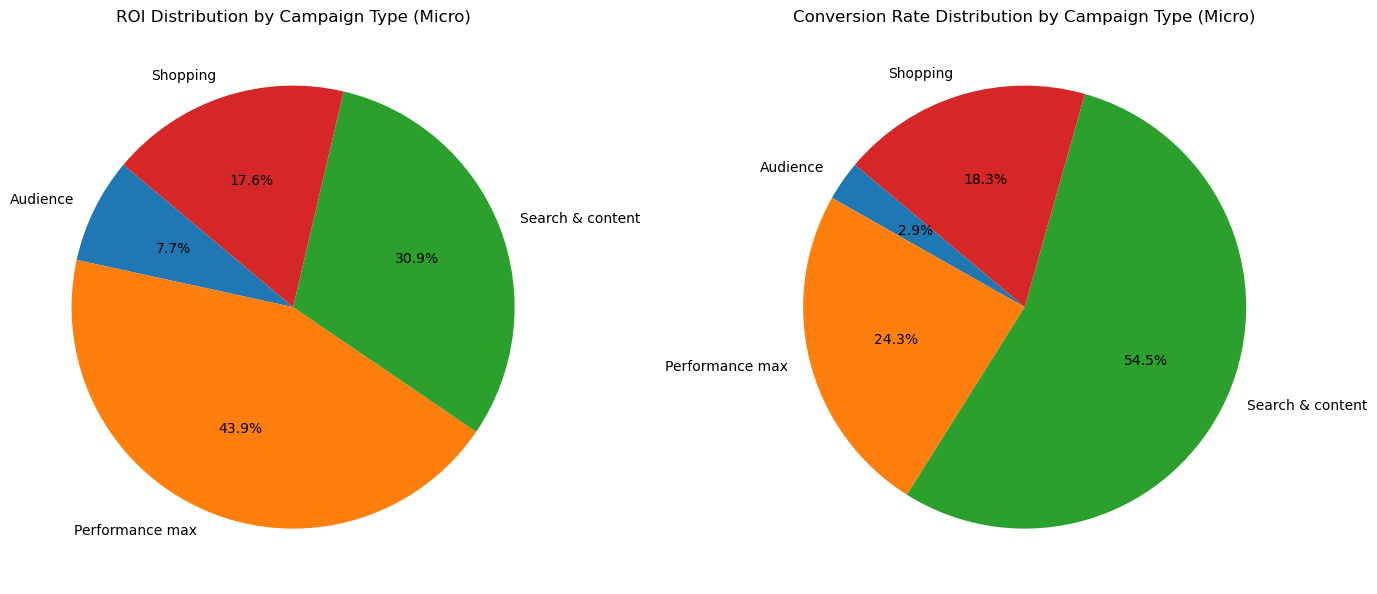

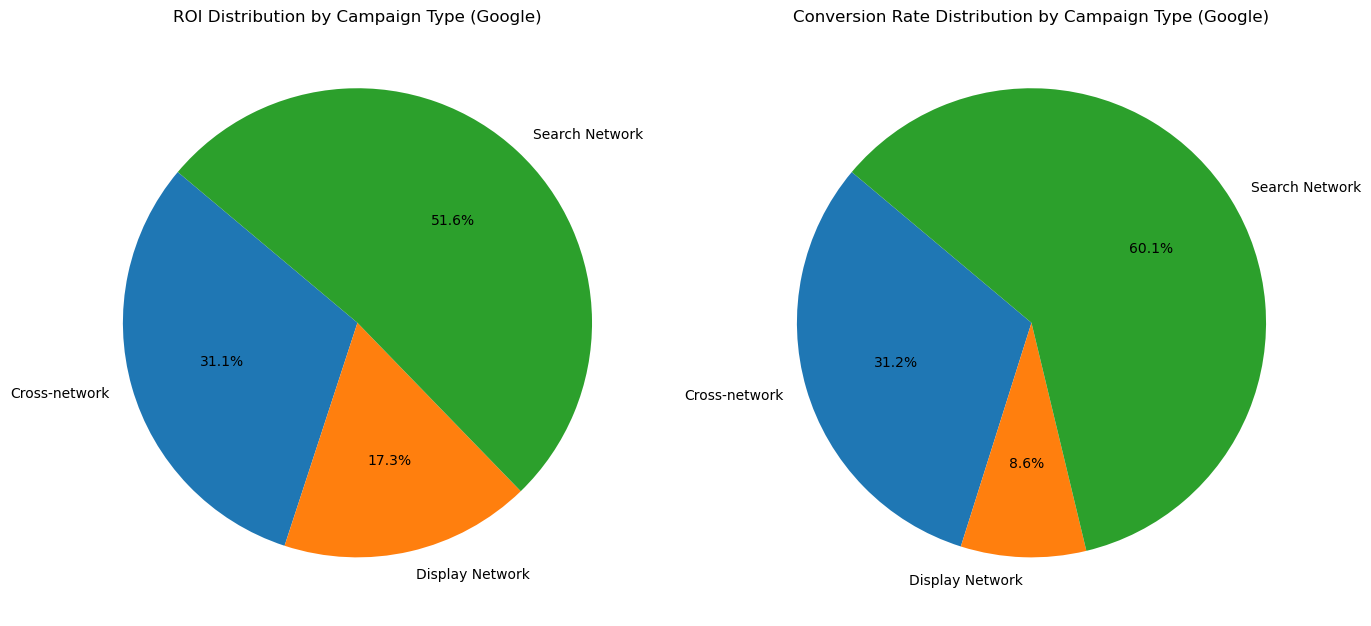

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
micro_combined = pd.read_csv('micro_combined_with_features.csv')
google_combined = pd.read_csv('google_combined_with_features.csv')

# Ensure 'Campaign type' column is present and analyze it
def plot_pie_charts(df, dataset_name):
    if 'Campaign type' in df.columns:
        # Calculate average ROI and Conversion Rate by Campaign type
        campaign_analysis = df.groupby('Campaign type').agg(
            Average_ROI=('ROI', 'mean'),
            Average_Conversion_Rate=('Conversion Rate', 'mean')
        ).reset_index()

        # Filter out rows with NaN or zero values
        campaign_analysis = campaign_analysis.dropna()
        campaign_analysis = campaign_analysis[campaign_analysis['Average_ROI'] > 0]
        campaign_analysis = campaign_analysis[campaign_analysis['Average_Conversion_Rate'] > 0]

        # Calculate proportions for ROI and Conversion Rate
        roi_proportions = campaign_analysis.set_index('Campaign type')['Average_ROI']
        conversion_rate_proportions = campaign_analysis.set_index('Campaign type')['Average_Conversion_Rate']

        # Plot pie charts
        plt.figure(figsize=(14, 7))

        # Pie chart for ROI
        plt.subplot(1, 2, 1)
        plt.pie(roi_proportions, labels=roi_proportions.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'ROI Distribution by Campaign Type ({dataset_name})')

        # Pie chart for Conversion Rate
        plt.subplot(1, 2, 2)
        plt.pie(conversion_rate_proportions, labels=conversion_rate_proportions.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Conversion Rate Distribution by Campaign Type ({dataset_name})')

        plt.tight_layout()
        plt.show()
    else:
        print(f"'Campaign type' column is not available in the {dataset_name} dataset.")

# Plot for Micro dataset
plot_pie_charts(micro_combined, 'Micro')

# Plot for Google dataset
plot_pie_charts(google_combined, 'Google')
